# Вебинары курса Рекомендательные системы

* Введение, примеры задач, бизнес- и ML-метрики
* Рекомендательные системы, основанные на диалоговом подходе.
* Коллаборативная фильтрация: ALS.
* Рекомендательные системы на основе контента. Поиск похожих товаров и пользователей
* Ранжирование и гибридные рекомендательные системы
* Двухуровневые модели рекомендаций
* Рекомендательные системы в бизнесе
* Консультация к финальному проекту


**Здесь не все метрики. Остальные смотреть здесь: https://habr.com/ru/company/econtenta/blog/303458/**

# Вебинар 1. Введение, примеры задач, бизнес- и ML-метрики 

Николай Котенко
1. ВШЭ: информационная бизнес-аналитика
2. Тинькофф: аналитик-разработчик
3. Сбер: Digital audit

-----

# 1. Введение и примеры задач

[RecSys everywhere](https://drive.google.com/file/d/1o9qF90P_AGoyYDn_aX3ph3kXnBQ55q7M/view?usp=sharing)
![recsys_everywhere.png](https://doc-0c-00-docs.googleusercontent.com/docs/securesc/u045mrnqq3gaepepj0kft7hhfjh2llut/66ffklqr619oc7dafahgh9kd11rsbp5i/1637174475000/17372739142422056321/07568582379379933431/1o9qF90P_AGoyYDn_aX3ph3kXnBQ55q7M?e=download&authuser=0&nonce=75osv2iikcsru&user=07568582379379933431&hash=pt5ceg7i0h0bpr15auras66p2bgqcs8u)

[Skills](https://drive.google.com/file/d/16n2C1NQ5UJR9lHaPhBanQJ-vCl38xQee/view?usp=sharing)
![Skills](https://doc-00-00-docs.googleusercontent.com/docs/securesc/u045mrnqq3gaepepj0kft7hhfjh2llut/jd04qjb22qu2suj82te8o23uprgpe0uf/1637174550000/17372739142422056321/07568582379379933431/16n2C1NQ5UJR9lHaPhBanQJ-vCl38xQee?e=download&authuser=0)

---

##  Постановка задачи

*Задача рекомендаций* - предложить пользователю товары, которые ему "понравятся"

Компоненты:
    - Пользователи (users)
    - Товары (items)
    - Взаимодействия (interactions) - по ним понимаем, что товар "понравился"

---

## Пользователи VS Товары

[ex_user_items](https://drive.google.com/file/d/1m-nBz2aGgozqqmgD5mDxdUT6yOr4D4H_/view?usp=sharing)
![ex_user_items](https://doc-0c-00-docs.googleusercontent.com/docs/securesc/u045mrnqq3gaepepj0kft7hhfjh2llut/a1j0o3g32rmjkmhp1h60hc2m8psjgi7f/1637174700000/17372739142422056321/07568582379379933431/1m-nBz2aGgozqqmgD5mDxdUT6yOr4D4H_?e=download&authuser=0&nonce=771viveqbrbec&user=07568582379379933431&hash=ausubfjtddu57dp3mfufe47djpduqitu)

**Кейс**: определить в каждой ситуации, что является пользователем, а что - товаром
    
    1. На сайте Кинопоиска порекомендовать интересные фильмы
    2. На сайте hh.ru подобрать лучшие вакансии для соискателя вакансий
    3. На сайте hh.ru найти похожие вакансии на ту, которую сейчас просматривает пользователь ("вам также может понравиться")
    3. На сайте hh.ru подобрать лучших кандидатов для работодателя
    
*Пример ответа в чате:*
    1. Пользователь (П) - фильм, Товар (T) - фильм
    2. П - работодатель, Т - соискатель вакансий

---

## Взаимодействия --> "понравился товар"

[ex_interactions](https://drive.google.com/file/d/1KjphiYNrkcK5YcRdEnsaDK0dOPdGT0Ct/view?usp=sharing)
![ex_interactions](https://doc-00-00-docs.googleusercontent.com/docs/securesc/u045mrnqq3gaepepj0kft7hhfjh2llut/6gqee5qofbc75pab0c9con99p6c56nlh/1637174700000/17372739142422056321/07568582379379933431/1KjphiYNrkcK5YcRdEnsaDK0dOPdGT0Ct?e=download&authuser=0)

---

## В чем отличие от классификации?

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.DataFrame([['Иван', 'Хлеб Бородинский', 1],
             ['Иван', 'Хлеб Белый', 0],
             ['Василий', 'Йогурт Epica', 1]], columns=['user', 'item', 'purchase_fact'])

,user,item,purchase_fact
0,Иван,Хлеб Бородинский,1
1,Иван,Хлеб Белый,0
2,Василий,Йогурт Epica,1


Постойте, ведь можно добавить фичи на user (средний чек, кол-во покупок в категориях и т.д), 
на item (цена, кол-во продаж в неделю и т.l), и решать задачу классификации. **В чем отличие RecSys от классификации?**

 - Много предсказаний для 1 user (extreme classification)
 - Гораздо больший объем данных: 100K users, 10K items --> 1B предсказаний
 - Большинство товаров user никогда не видел --> Не взаимодействовал --> 0 не значит "не понравился"
 - Нет явного таргета. Не понятно, что значит "(не) понравился"
 - Feedback loop
 - Иногдаь важен порядок рекомендаций

In [3]:
pd.DataFrame([['Иван', 'Хлеб Бородинский', 1],
              ['Иван', 'Хлеб Белый', 0],
              ['Иван', 'Йогурт Epica', "?"],
              ['Василий', 'Хлеб Бородинский', "?"],
              ['Василий', 'Хлеб Белый', "?"],
              ['Василий', 'Йогурт Epica', 1]], columns=['user', 'item', 'purchase_fact'])

,user,item,purchase_fact
0,Иван,Хлеб Бородинский,1
1,Иван,Хлеб Белый,0
2,Иван,Йогурт Epica,?
3,Василий,Хлеб Бородинский,?
4,Василий,Хлеб Белый,?
5,Василий,Йогурт Epica,1


----

## Основные типы задач:
    
**Рекомендация топ-К товаров**: Дан список товаров. Рекомендовать пользователю K товаров, которые ему понравятся
    - e-mail рассылки (М.Видео, Hoff, Пятерочка)
    - push-уведомления (Delivery Club, HeadHunter, Виктория)
    - Рекомендации в отдельном окне на сайте (vk, okko)

**Ранжирование товаров**: Дан список товаров. Нужно его отранжировать в порядке убывания интереса для пользователя
    - Ранжирование каталога товаров (Wildberries, Lamoda)
    - Ранжирование ленты (vk, Я.Дзен)
    - Ранжирование поисковой выдачи (Яндекс, Гугл)
    - Ранжирование "каруселей" товаров (Delivery Club, Я.Еда)
    
**Поиск похожих товаров**: Дан 1 товар. Нужно найти наиболее похожие на него товары
    - "Вам также может понравиться" (Ozon, Циан)
    - Похожим пользователям понравилось (vk)
    - Вы можете быть знакомы (vk, facebook)
    
**Рекомендация дополнителдьного товара**. Дан 1 товар. Найти товары, которые покупают вместе с этим товаром
    - С этим товаром часто покупают (Я.Маркет, Ozon, М.Видео)
    
   
---
На 7 вебинаре мы разберем рекомендательные системы из HeadHunter, Я.Дзен и vk

---

# 2. ML-mетрики качества

*Хороши ли рекомендации, предлагаемые моделью?*  
Обычно считаются для каждого юзера, затем усредняются по юзерам

Представим, что в магазине всего 10 товаров

In [32]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

### 1. Hit rate

Hit rate = был ли хотя бы 1 релевантный товар среди рекомендованных

- Иногда применяется, когда продаются достаточно дрогие товары (например, бытовая техника) 

----
Hit rate = (был ли хотя бы 1 релевантный товар среди рекомендованных)   

Hit rate@k = (был ли хотя бы 1 релевантный товар среди топ-k рекомендованных)

In [33]:
def hit_rate(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)

    flags = np.isin(bought_list, recommended_list)

    hit_rate = (flags.sum() > 0) * 1

    return hit_rate


def hit_rate_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    flags = np.isin(bought_list, recommended_list)

    hit_rate = (flags.sum() > 0) * 1
    
    return hit_rate

In [34]:
hit_rate(recommended_list, bought_list)

1

In [35]:
hit_rate_at_k(recommended_list, bought_list, 3)

1

### 2. Precision

*Precision* - доля релевантных товаров среди рекомендованных = Какой % рекомендованных товаров  юзер купил

- Пожалуй, самая приближенная к бизнес-метрикам и самая популярная метрика

---

Precision= (# of recommended items that are relevant) / (# of recommended items)  

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

Money Precision@k = (revenue of recommended items @k that are relevant) / (revenue of recommended items @k)  

**Note:** Обычно k в precision@k достаточно невелико (5-20) и определяется из бизнес-логики. Например, 5 товаров в e-mail рассылке, 20 ответов на первой странице google и т.д

Красная рыба - 400 руб  
Молоко - 60 руб  
Хлеб = 40 руб  
Гречка = 40 руб  
Шоколад = 90 руб  

------  
Варенье - 240 руб  
...  

**Case 1**  
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [1, 0, 0, 0 , 1]  

$precison@5 = \frac{1 + 0 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{1*400 + 0*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 77.7\%$  

  
**Case 2**   
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [0, 1, 0, 0 , 1]  

$precison@5 = \frac{0 + 1 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{0*400 + 1*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 15.8\%$ 
верно не 15.8%, а 23.8%

In [12]:
def precision(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    return precision


def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    
    return precision


def money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5):
        
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags @ prices_recommended[:len(flags)] / sum(prices_recommended[:len(flags)])
    
    return precision

In [77]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
prices_recommended = [400, 60, 40, 40, 90, 90, 70, 80, 30, 25]
bought_list = [521, 32, 143, 991]

In [37]:
precision(recommended_list, bought_list)

0.2

In [83]:
precision_at_k(recommended_list, bought_list, k=3)

0.3333333333333333

In [82]:
precision_at_k(recommended_list, bought_list, k=3)

0.3333333333333333

In [95]:
money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5)

0.14814814814814814

In [16]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43]
prices_recommended = [400, 60, 40, 40, 90]
bought_list_1 = [143, 111, 32, 533, 991]
bought_list_2 = [521, 156, 32, 533, 27]

print(precision_at_k(recommended_list, bought_list_1, k=5))
print(money_precision_at_k(recommended_list, bought_list_1, prices_recommended, k=5))
print(precision_at_k(recommended_list, bought_list_2, k=5))
print(money_precision_at_k(recommended_list, bought_list_2, prices_recommended, k=5))

0.4
0.7777777777777778
0.4
0.23809523809523808


### 3. Recall

*Recall* - доля рекомендованных товаров среди релевантных = Какой % купленных товаров был среди рекомендованных

- Обычно используется для моделей пре-фильтрации товаров (убрать те товары, которые точно не будем рекомендовать)

---

Recall= (# of recommended items that are relevant) / (# of relevant items)  

Recall@k = (# of recommended items @k that are relevant) / (# of relevant items)

Money Recall@k = (revenue of recommended items @k that are relevant) / (revenue of relevant items)  

    
  
**Note:** в recall@k число k обычно достаточно большое (50-200), больше чем покупок у среднестатистического юзера

In [71]:
def recall(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall


def recall_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall


def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags @ prices_recommended[:len(bought_list)] / sum(prices_recommended)
    
    return recall

In [43]:
recall(recommended_list, bought_list)

0.5

In [66]:
recall_at_k(recommended_list, bought_list, 5)

0.5

In [72]:
money_recall_at_k(recommended_list, bought_list, [400, 60, 40, 40, 90], 5)

0.12698412698412698

---

# Метрики ранжирования

Если важен порядок рекомендаций. Подробнее можно почитать [здесь](https://habr.com/ru/company/econtenta/blog/303458/). Формулы в статье могут несколько отличаться от формул в лекции 

## AP@k
AP@k - average precision at k

$$AP@k = \frac{1}{r} \sum{[recommended_{relevant_i}] * precision@k}$$

- r - кол-во релевантный среди рекомендованных
- Суммируем по всем релевантным товарам
- Зависит от порядка реокмендаций

In [14]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(0, k-1):
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i+1)
            sum_ += p_k
            
    result = sum_ / sum(flags)
    
    return result

In [17]:
ap_k(recommended_list, bought_list, k=5)

0.75

### MAP@k

MAP@k (Mean Average Precision@k)  
Среднее AP@k по всем юзерам
- Показывает средневзвешенную точность рекомендаций

$$MAP@k = \frac{1}{|U|} \sum_u{AP_k}$$
  
|U| - кол-во юзеров

In [18]:
def map_k(recommended_list, bought_list, k=5):
    
    # your_code
    
    return result

### AUC@k
AUC для первых k наблюдений  
- Можно посчитать как sklern.metrics.roc_auc_score для топ-k предсказаний
- Показывает долю верно отранжированных товаров

### NDCG@k
Normalized discounted cumulative gain

$$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}}$$  

$discount(i) = 1$ if $i <= 2$,   
$discount(i) = log_2(i)$ if $i > 2$


(!) Считаем для первых k рекоммендаций   
(!) - существуют вариации с другими $discount(i)$  
i - ранк рекомендованного товара  
|r| - кол-во рекомендованных товаров 

$$NDCG = \frac{DCG}{ideal DCG}$$


In [ ]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

$DCG@5 = \frac{1}{5}*(1 / 1 + 0 / 2 + 0 / log(3) + 1 / log(4) + 0 / log(5))$  
$ideal DCG@5 = \frac{1}{5}*(1 / 1 + 1 / 2 + 1 / log(3) + 1 / log(4) + 1 / log(5))$  

$NDCG = \frac{DCG}{ideal DCG}$

### MRR@k
Mean Reciprocal Rank

- Считаем для первых k рекоммендаций
- Найти ранк первого релевантного предсказания $k_u$
- Посчитать reciprocal rank = $\frac{1}{k_u}$

$$MRR = mean(\frac{1}{k_u})$$

[MRR](https://drive.google.com/file/d/1uMFKqWULFmehS0pJtvXKRygjYxQOPise/view?usp=sharing)

In [ ]:
def reciprocal_rank(recommended_list, bought_list):
    # your_code
    return result

# 3. Связь бизнес-метрик, ML-метрик и функции потерь(loss)

- **loss** - то, что оптимизирует модель (RMSE - Root Mean Squared Error)
- **ML-метрика** - то, как мы измеряем качество на test (money precision@5)
- **Бизнес-метрика** - то, что хочет оптимизировать бизнес (выручка)

В идеале loss = ML-метрика = бизнес-метрика, но это возмонжо в очень редких случаях

Надеемся, что:  
    *Оптимизация loss --> рост ML-метрик --> рост бизнес-метрик*

### Пример: рекомендательная система товаров на сайте  
      
На сайте есть баннер, на котором мы можем разместить 5 товаров. Надо порекомендовать эти 5 товаров персонально каждому юзеру

*Шаг 1: Определим бизнес-метрику*  
Бизнес хочет максимизировать выручку --> бизнес-метрика - **Выручка**  

*Шаг 2: Разложим ее на составляющие*  
Выручка =   
       Средний чек * кол-во покупок =   
       Средний чек * (число юзеров * конверсия из захода на сайт в заказ) =
       Число юзеров * (Средний чек * конверсия из захода на сайт в заказ)
       
Рекомендательная система влияет только на (Средний чек * конверсия из захода на сайт в заказ).   
Хорошим приближением этого является **money precision@5** - ML-метрика

*Шаг 3: loss*  
Это существенно сложнее. Персонализированные ML-модели не умеют напрямую оптимизировать конверсию. Стандартный loss - **RMSE**. Можно для начала попробовать его. 

P.S. Если вы хотите приблизить RMSE к money precision@5, то можно посчитать weighted RMSE, где вес каждого наблюдения = стоимость товара.   
P.S.S. Про другие виды loss будет рассказано в курсе

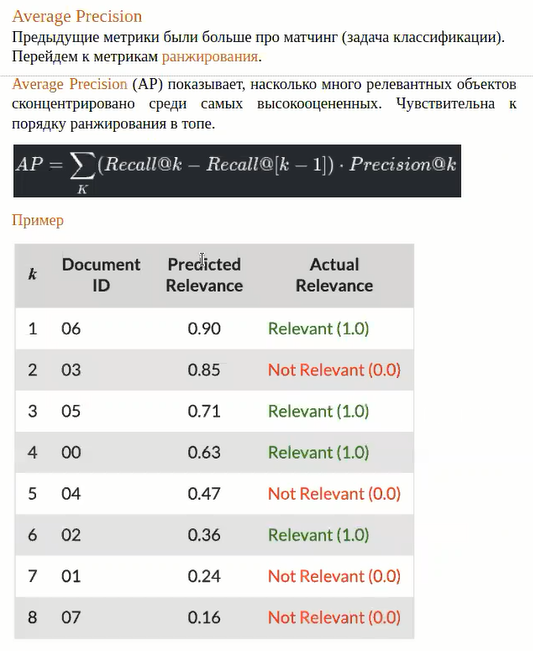
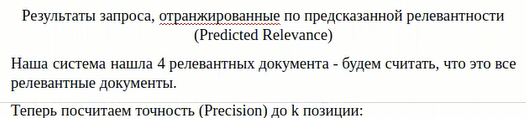
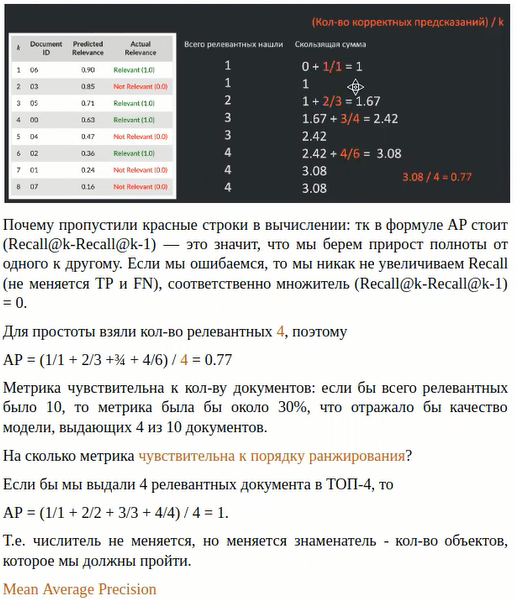
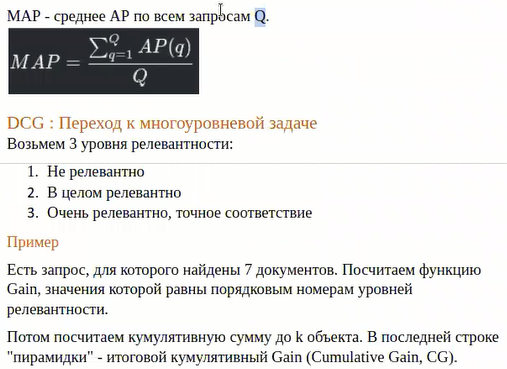
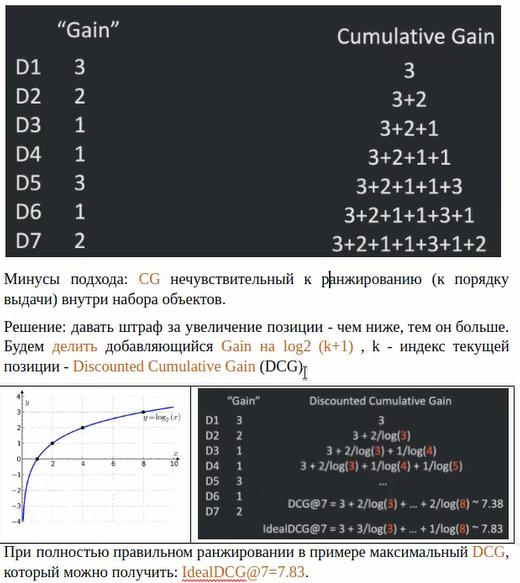
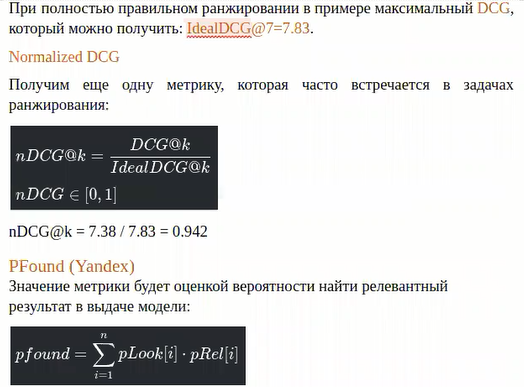
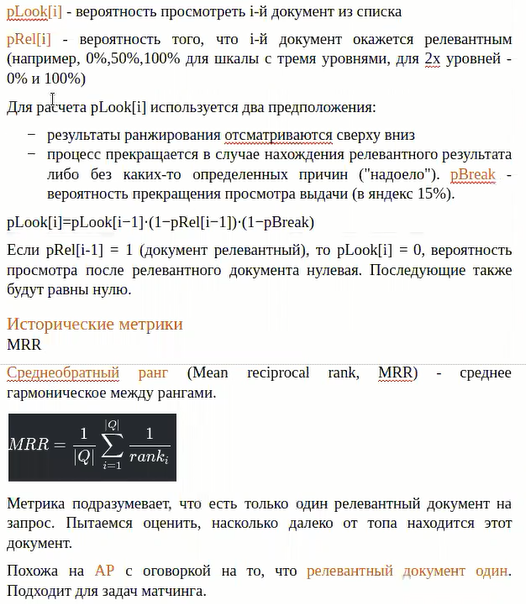
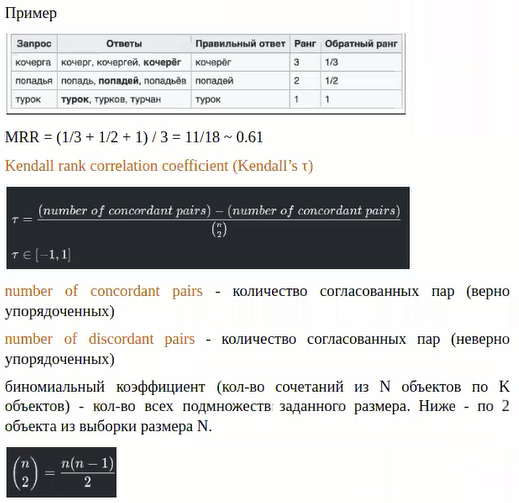